# Intelligent Systems (SInt) - Group Project

## **Fuzzy Data Analysis with Multi-Method Classification for Predicting Heart Disease**

Group No.: 9

Students:
- Pedro Geitoeira, No. 87489
- Eloy Marquesan Dones, No. 112861

**GitHub**: [SInt_G09](https://github.com/pedrogeitoeira/SInt_G09.git)

## Data Analysis

### Imports

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Data Preprocessing

In [11]:
# Load the dataset.
data = pd.read_csv('data/heart_disease.csv')

# Extract the variable names.
var_names = data.columns

# Print the original variable names.
print("Variable names:")
for var in var_names:
    print(var)

Variable names:
age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target


In [12]:
# Manually provide the updated variable names.
new_var_names = ['Age',
                 'Sex',
                 'ChestPainType',
                 'RestingBloodPressure',
                 'SerumCholesterol',
                 'FastingBloodSugar',
                 'RestingElectrocardiographicResults',
                 'MaximumHeartRateAchieved',
                 'ExerciseInducedAngina',
                 'Oldpeak',
                 'SlopeOfThePeakExerciseSTSegment',
                 'NumberOfMajorVessels',
                 'Thal',
                 'HeartDisease']

# Update the column names in the dataset.
data.columns = new_var_names

# Print the updated variable names.
print('Updated variable names:')
for var in data.columns:
    print(var)

Updated variable names:
Age
Sex
ChestPainType
RestingBloodPressure
SerumCholesterol
FastingBloodSugar
RestingElectrocardiographicResults
MaximumHeartRateAchieved
ExerciseInducedAngina
Oldpeak
SlopeOfThePeakExerciseSTSegment
NumberOfMajorVessels
Thal
HeartDisease


In [13]:
# Check for the presence of NaN values and determine if there are any non-numeric entries.
nan_check = data.isna().sum() # Check for the presence of NaN values.
non_numeric_check = data.apply(lambda col: col.map(lambda x: isinstance(x, str)).sum()) # Check for the presence of string entries.

# Print the number of NaN entries in each variable column.
print('Number of NaN entries in each variable column:')
for column, count in nan_check.items():
    print(f'{column}: {count}')

# Print the number of non-numeric entries in each variable column.
print('\nNumber of non-numeric entries in each variable column:')
for column, count in non_numeric_check.items():
    print(f'{column}: {count}')

Number of NaN entries in each variable column:
Age: 0
Sex: 0
ChestPainType: 0
RestingBloodPressure: 0
SerumCholesterol: 0
FastingBloodSugar: 0
RestingElectrocardiographicResults: 0
MaximumHeartRateAchieved: 0
ExerciseInducedAngina: 0
Oldpeak: 0
SlopeOfThePeakExerciseSTSegment: 0
NumberOfMajorVessels: 0
Thal: 0
HeartDisease: 0

Number of non-numeric entries in each variable column:
Age: 0
Sex: 0
ChestPainType: 0
RestingBloodPressure: 0
SerumCholesterol: 0
FastingBloodSugar: 0
RestingElectrocardiographicResults: 0
MaximumHeartRateAchieved: 0
ExerciseInducedAngina: 0
Oldpeak: 0
SlopeOfThePeakExerciseSTSegment: 0
NumberOfMajorVessels: 0
Thal: 0
HeartDisease: 0


**The dataset appears to be clean**. It does not contain any NaN (missing) values or string (non-numeric) entries in any of the columns. Each entry in the dataset seems to be valid.

In [14]:
# Check for class imbalance.
class_distribution = data['HeartDisease'].value_counts(normalize = True)*100

# Format the class distribution as a percentage with two decimal places.
class_distribution = class_distribution.map('{:.2f}%'.format)

# Print the class distribution.
print('Class distribution:')
for index, value in class_distribution.items():
    print(f'{index}: {value}')

Class distribution:
1: 51.32%
0: 48.68%


**The dataset does not exhibit significant class imbalance**. The distribution between the two classes (1 and 0) is nearly even, indicating that special techniques, such as resampling (oversampling or undersampling) or class weighting, are unlikely to be necessary for handling class imbalance during the modeling process.

In [15]:
# Extract the feature names.
feature_names = data.columns[:-1]

# # Normalize the dataset to the range [0, 1].
# scaler = MinMaxScaler()
# data_np = scaler.fit_transform(data_np)

### Summary Statistics (Mean, Median, Standard Deviation, Min, Max, and Quartiles)

In [16]:
# Compute the summary statistics for the dataset.
summary_stats = data.describe()

print('Summary statistics:')
summary_stats

Summary statistics:


,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingElectrocardiographicResults,MaximumHeartRateAchieved,ExerciseInducedAngina,Oldpeak,SlopeOfThePeakExerciseSTSegment,NumberOfMajorVessels,Thal,HeartDisease
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### Continuous Variables
- **Age**: Ranges from 29 to 77 years, with a mean age of around 54, indicating a sample of mostly middle-aged and older individuals.
- **Resting Blood Pressure (trestbps)**: Spans from 94 to 200 mm Hg, with an average of 131 mm Hg, covering both normal and elevated blood pressure levels.
- **Cholesterol (chol)**: Varies widely from 126 to 564 mg/dL, with a mean of 246 mg/dL, representing both typical and elevated cholesterol levels.
- **Maximum Heart Rate (thalach)**: Ranges from 71 to 202 bpm, with an average of 149 bpm, showing a diverse range of cardiac responses.
- **ST Depression (oldpeak)**: Values range from 0 to 6.2, with a mean of 1.07, reflecting variations in exercise-induced ST depression.

##### Categorical Variables
- **Sex**: Predominantly male (n = 713) compared to female (n = 312).
- **Chest Pain Type (cp)**: The most common type is type 0 (n=497), with four categories represented.
- **Fasting Blood Sugar (fbs)**: Most values are 0 (n = 872), indicating fasting blood sugar levels ≤120 mg/dL for the majority.
- **Resting ECG (restecg)**: Roughly evenly split between categories 0 and 1.
- **Exercise-Induced Angina (exang)**: Mostly absent (n = 680), indicating that most participants did not experience angina.
- **Slope**: Primarily types 1 and 2, with type 1 being the most common.
- **Number of Major Vessels (ca)**: Ranges from 0 to 4, with 0 being the most frequent, indicating different levels of vascular blockage.
- **Thalassemia (thal)**: Primarily in categories 2 and 3.
- **Target (Presence of Heart Disease)**: Nearly even split between those with and without heart disease, with 526 cases indicating disease presence.

### Variable Distribution Histograms (Features and Target)

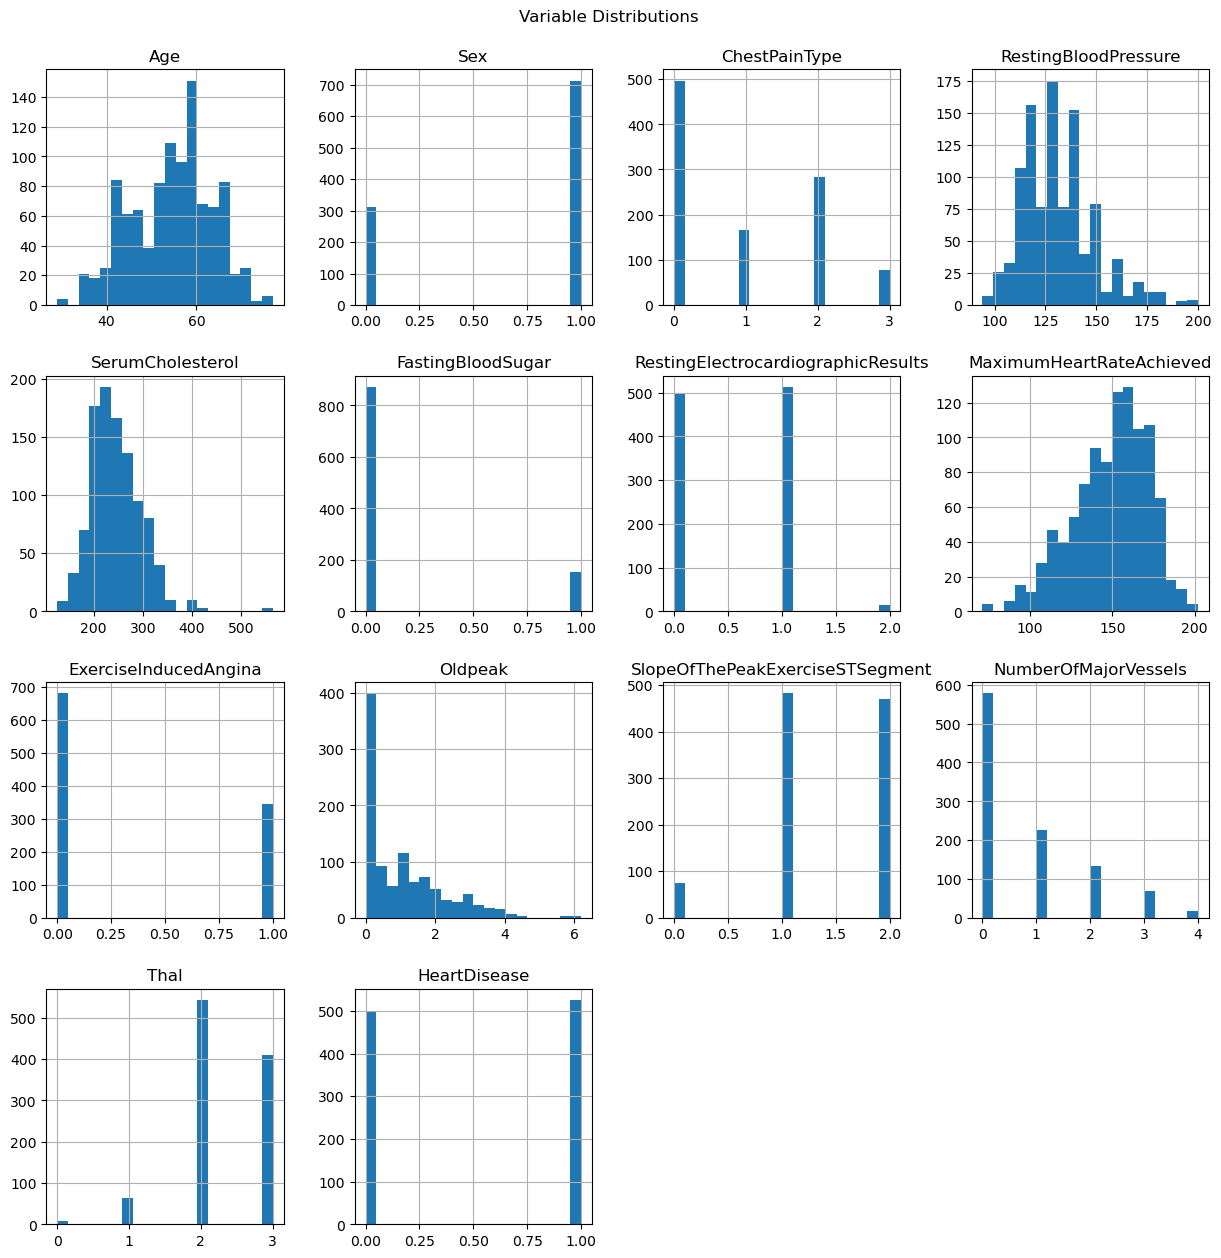

In [17]:
# Plot histograms for each variable.
data.hist(bins = 20, figsize = (15, 15))
plt.suptitle('Variable Distributions', y = 0.92)
plt.show()

### Correlation Matrix

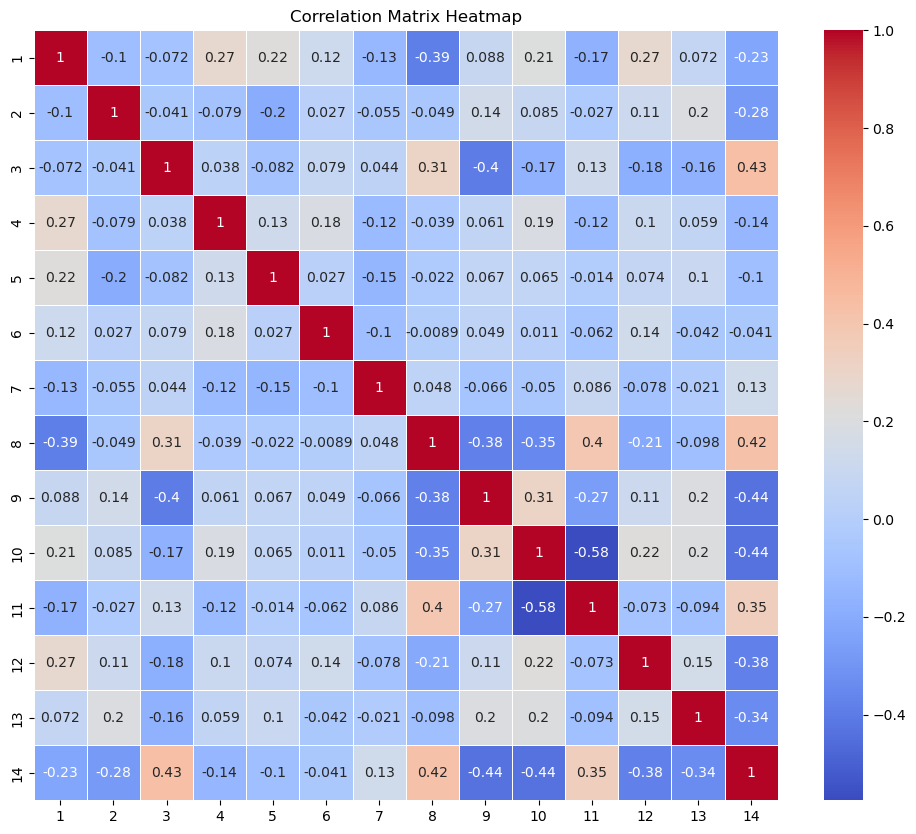

In [18]:
# Compute the correlation matrix for the dataset.
correlation_matrix = data.corr()

# Generate a list of labels for the correlation matrix heatmap.
num_columns = correlation_matrix.shape[1]
labels = list(range(1, num_columns + 1))

# Plot the correlation matrix heatmap.
plt.figure(figsize = (12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5,
            xticklabels = labels, yticklabels = labels)
plt.title('Correlation Matrix Heatmap')
plt.show()

where:
1. **Age**
2. **Sex**
3. **Chest Pain Type**
4. **Resting Blood Pressure**
5. **Serum Cholesterol**
6. **Fasting Blood Sugar**
7. **Resting Electrocardiographic Results**
8. **Maximum Heart Rate Achieved**
9. **Exercise-Induced Angina**
10. **ST Depression (Oldpeak)**
11. **Slope of the Peak Exercise ST Segment**
12. **Number of Major Vessels Colored by Fluoroscopy**
13. **Thalassemia**
14. **Heart Disease**

**Key Predictors**: **Chest pain type** (r = 0.43), **maximum heart rate achieved** (r = 0.42), **exercise-induced angina** (r = -0.44), and **ST depression** (r = -0.44) show moderate correlations with heart disease, making them stronger indicators.

**Negative Correlations**: Higher values of **ST depression** (r = -0.44) and **major vessels colored by fluoroscopy** (r = -0.38) are linked to a lower probability of heart disease.

**Weak Predictors**: Variables like **resting blood pressure** (r = -0.14), **serum cholesterol** (r = -0.10), **fasting blood sugar** (r = -0.04), **resting electrocardiographic results** (r = 0.13) and  show weak correlations with heart disease, suggesting they may be less useful in predicting it.

Overall, focusing on chest pain, max heart rate, and exercise-induced factors could enhance heart disease prediction accuracy in this dataset.